In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

import warnings
warnings.filterwarnings('ignore')

# ***TASK: EDA on Countries participated, disciplines, events & coaches***

In [5]:
gender = pd.read_excel('EntriesGender.xlsx')
athletes = pd.read_excel('Athletes.xlsx')
teams = pd.read_excel('Teams.xlsx')
medals = pd.read_excel('Medals.xlsx')
coaches = pd.read_excel('Coaches.xlsx')

## **1. Gender EDA**

In [7]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Discipline  46 non-null     object
 1   Female      46 non-null     int64 
 2   Male        46 non-null     int64 
 3   Total       46 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.6+ KB


In [9]:
gender.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [10]:
gender.describe()

,Female,Male,Total
count,46.000000,46.000000,46.00000
mean,118.086957,127.913043,246.00000
std,147.169717,166.900746,312.46134
min,10.000000,0.000000,19.00000
25%,42.750000,40.250000,85.50000
50%,90.000000,97.500000,190.00000
75%,138.750000,149.750000,288.75000
max,969.000000,1072.000000,2041.00000


In [16]:
# Min male athletes number is 0, so we should find out which discipline has no male athlete

gender[gender['Male'] == 0]

,Discipline,Female,Male,Total
28,Rhythmic Gymnastics,96,0,96
3,Artistic Swimming,105,0,105


In [11]:
gender.sort_values(by='Total',inplace=True)

In [15]:
gender.head()

,Discipline,Female,Male,Total
12,Cycling BMX Freestyle,10,9,19
40,Trampoline Gymnastics,16,16,32
35,Surfing,20,20,40
34,Sport Climbing,20,20,40
13,Cycling BMX Racing,24,24,48


### __- Rhythmic Gymnastics and Artistic Swimming has no Male Participants__
### **- Max number of participants in the Athletics Disciplines: Male: 1072, Female: 969**
### **- The least number of paticipants is in the Cycling BMX Freestyle with 19 in total: Male: 9, Female:10**  

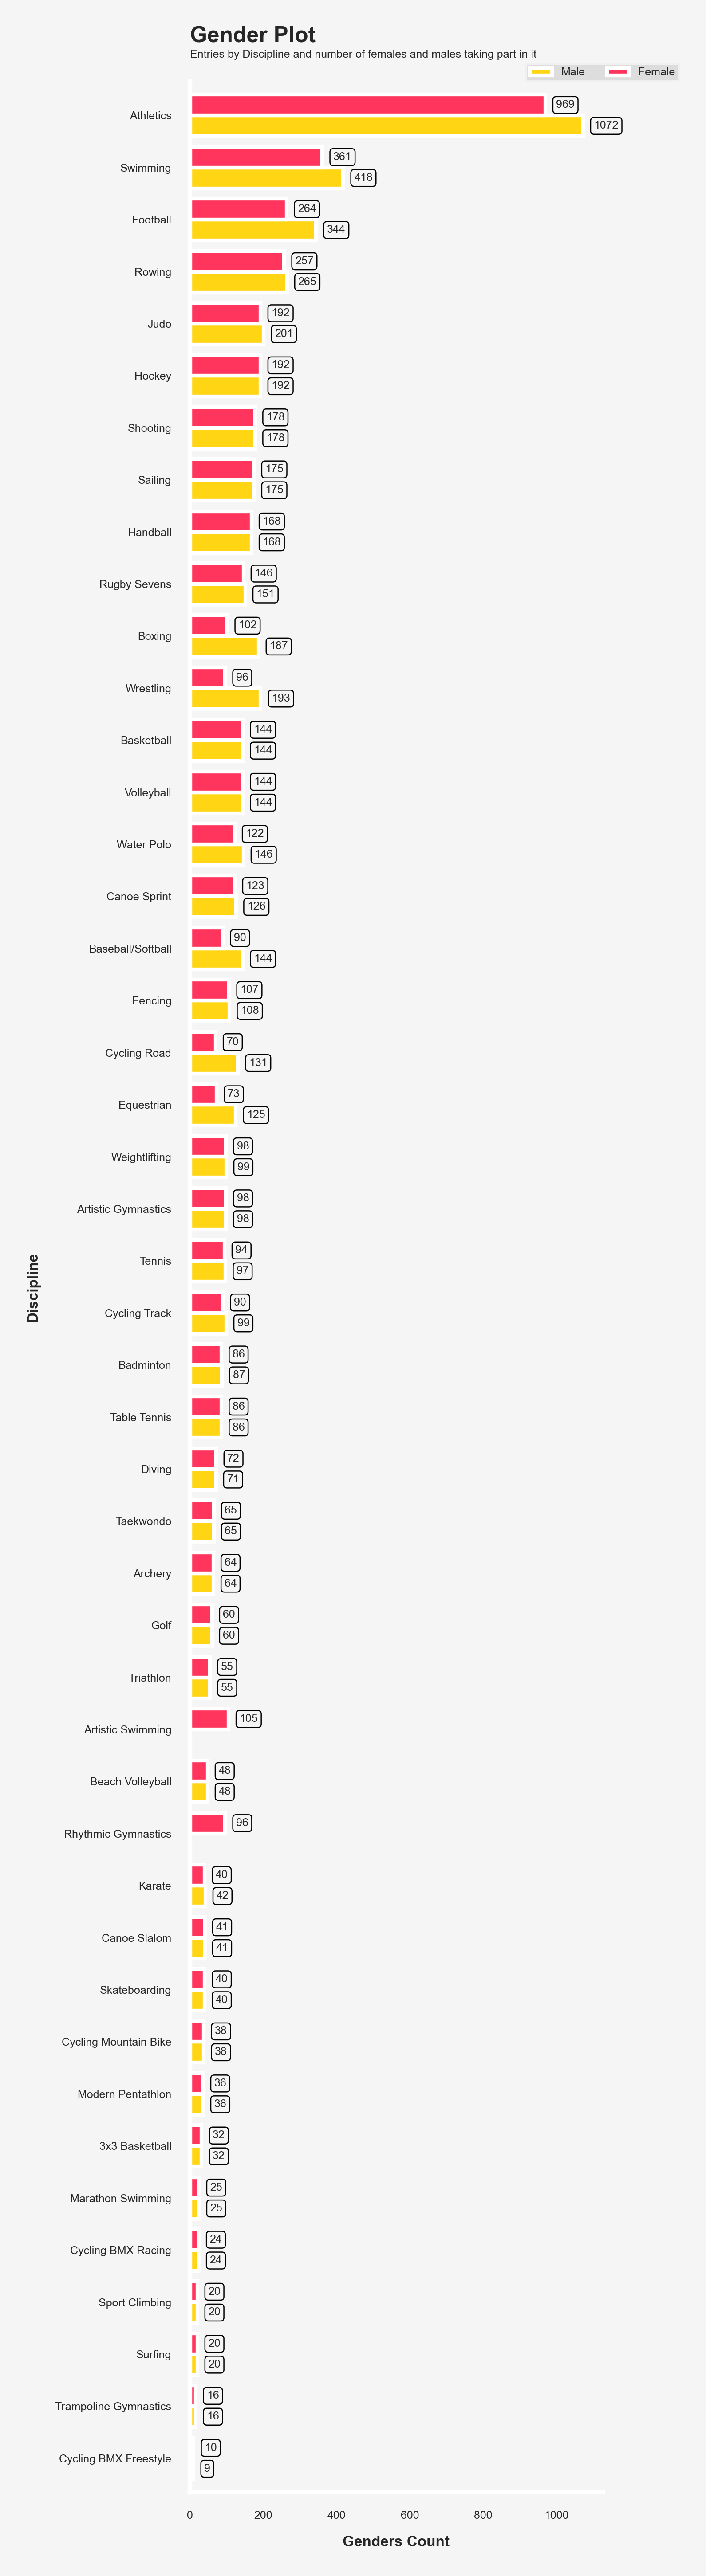

In [78]:
# Gender stacked barplot
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(2,12),facecolor='#f6f5f5')
gs = fig.add_gridspec(1,1)
gs.update(wspace=1.5, hspace=0.05)

background_color = "#f6f5f5"
sns.set_palette(['#ffd514','#ff355d'])

ax0 = fig.add_subplot(gs[0,0])

for s in ['right','top']:
    ax0.spines[s].set_visible(False)

ax0.set_facecolor(background_color)
ax0_sns = gender.plot(x='Discipline',y=['Male','Female'],kind='barh',ax=ax0,zorder=2,width=0.8)
ax0_sns.set_xlabel('Genders Count',fontsize=4, weight='bold',)
ax0_sns.set_ylabel('Discipline',fontsize=4, weight='bold')
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)

ax0_sns.tick_params(labelsize=3, width=0.5, length=1.5)

ax0_sns.legend(['Male', 'Female'], ncol=2, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1, 1.01), loc='upper center')

for p in ax0_sns.patches:
            value = f'{p.get_width():.0f}'
            if value == '0':
                pass
            else:
                x = p.get_x() + p.get_width() + 30
                y = p.get_y() + p.get_height() / 2 
                ax0.text(x, y, value, ha='left', va='center', fontsize=3, 
                        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

ax0_sns.text(0,46.4, f'Gender Plot', fontsize=6, weight='bold',ha='left')
ax0.text(0, 46.11,f'Entries by Discipline and number of females and males taking part in it',fontsize=3,ha='left')

#ax0.get_xaxis().set_m8ajor_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

## **2. Athletes EDA**

In [33]:
athletes.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [34]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11085 entries, 0 to 11084
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        11085 non-null  object
 1   NOC         11085 non-null  object
 2   Discipline  11085 non-null  object
dtypes: object(3)
memory usage: 259.9+ KB


### **Which country has the largest number of Athletes?**

In [40]:
athletes_grp = athletes.groupby('NOC').count().sort_values(by='Name')

In [41]:
athletes_grp['Name'].max()

615

In [43]:
athletes_grp[athletes_grp['Name']==athletes_grp['Name'].max()]

,Name,Discipline
NOC,,
United States of America,615,615


In [44]:
athletes_grp['Name'].min()

2

In [45]:
athletes_grp[athletes_grp['Name']==athletes_grp['Name'].min()]

,Name,Discipline
NOC,,
Dominica,2,2
St Vincent and the Grenadines,2,2
Lesotho,2,2
Brunei Darussalam,2,2
Saint Kitts and Nevis,2,2
Nauru,2,2
Myanmar,2,2
South Sudan,2,2
Tuvalu,2,2


In [67]:
athletes['NOC'].value_counts()

United States of America         615
Japan                            586
Australia                        470
People's Republic of China       401
Germany                          400
                                ... 
Andorra                            2
Myanmar                            2
Tuvalu                             2
Vanuatu                            2
St Vincent and the Grenadines      2
Name: NOC, Length: 206, dtype: int64

### **- The maximum number of Athletes is from the United States of America: 615**
### **- The minimum number of Athletes is from South Sudan, along with 16 more countries where only 2 Athletes participated**

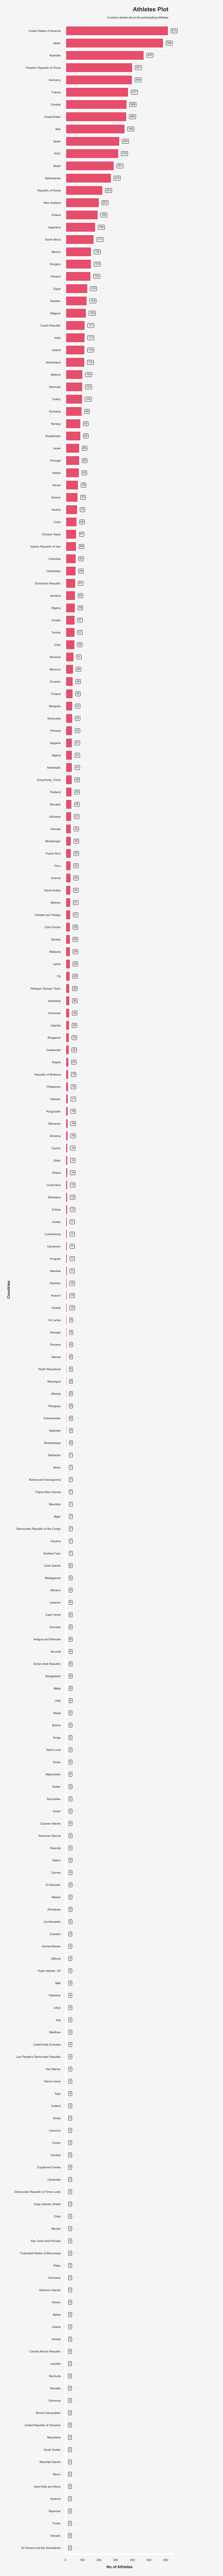

In [79]:
# athletes.head(10)
#athletes.shape #(11085, 3)
# athletes.info()
# athletes.describe().T
# athletes.sort_values(by='Total',inplace=True)
y = athletes.NOC.value_counts().index
x = athletes.NOC.value_counts().values

# Athletes barplot with Discipline
plt.rcParams['figure.dpi'] = 600

fig = plt.figure(figsize=(2,48), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=1.5, hspace=0.05)

background_color = "#f6f5f5"
sns.set_palette(['#ff355d']*1200)
ax0 = fig.add_subplot(gs[0, 0])


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    
ax0.set_facecolor(background_color)


ax0_sns = sns.barplot(data=athletes,y=y,x=x,zorder=2)
ax0_sns.set_xlabel('No of Athletes',fontsize=4, weight='bold')
ax0_sns.set_ylabel('Countries',fontsize=4, weight='bold')

ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax0_sns.tick_params(labelsize=3, width=0.5, length=1.5)

# ax0_sns.legend(ncol=4, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1.022, 1.005), loc='upper right')

for p in ax0_sns.patches:
            value = f'{p.get_width():.0f}'
            x = p.get_x() + p.get_width() + 20
            y = p.get_y() + p.get_height() / 2 
            ax0.text(x, y, value, ha='left', va='center', fontsize=3, 
                    bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

# plt.title(f'Athletes Plot',fontdict=dict(fontsize=6,weight='bold',horizontalalignment= 'right'),loc='right')

ax0_sns.text(900,45.4, f'Ankit kalauni',alpha=0.3, fontsize=6, weight='bold',ha='right',color='w') #ignore this line if you reading this



ax0_sns.text(615,-1.6, f'Athletes Plot', fontsize=6, weight='bold',ha='right')
ax0.text(615,-1,f'Contains details about the participating Athletes',fontsize=3,ha='right')
#ax0.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

## **3. Teams EDA**

In [72]:
teams.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


In [75]:
teams['Discipline'].value_counts()

Swimming               113
Athletics               79
Cycling Track           64
Archery                 53
Fencing                 52
Beach Volleyball        48
Table Tennis            48
Artistic Swimming       32
Football                28
Basketball              24
Hockey                  24
Rugby Sevens            24
Handball                24
Volleyball              24
Artistic Gymnastics     24
Water Polo              22
Triathlon               18
3x3 Basketball          16
Rhythmic Gymnastics     14
Baseball/Softball       12
Name: Discipline, dtype: int64

### **- There are 113 Countries in the Swimming Discipline. which is the maximum number of country participation.**
### **- There are 12 Countries in Baseball/Softball Discipline. which is the minimum number of country participation.**

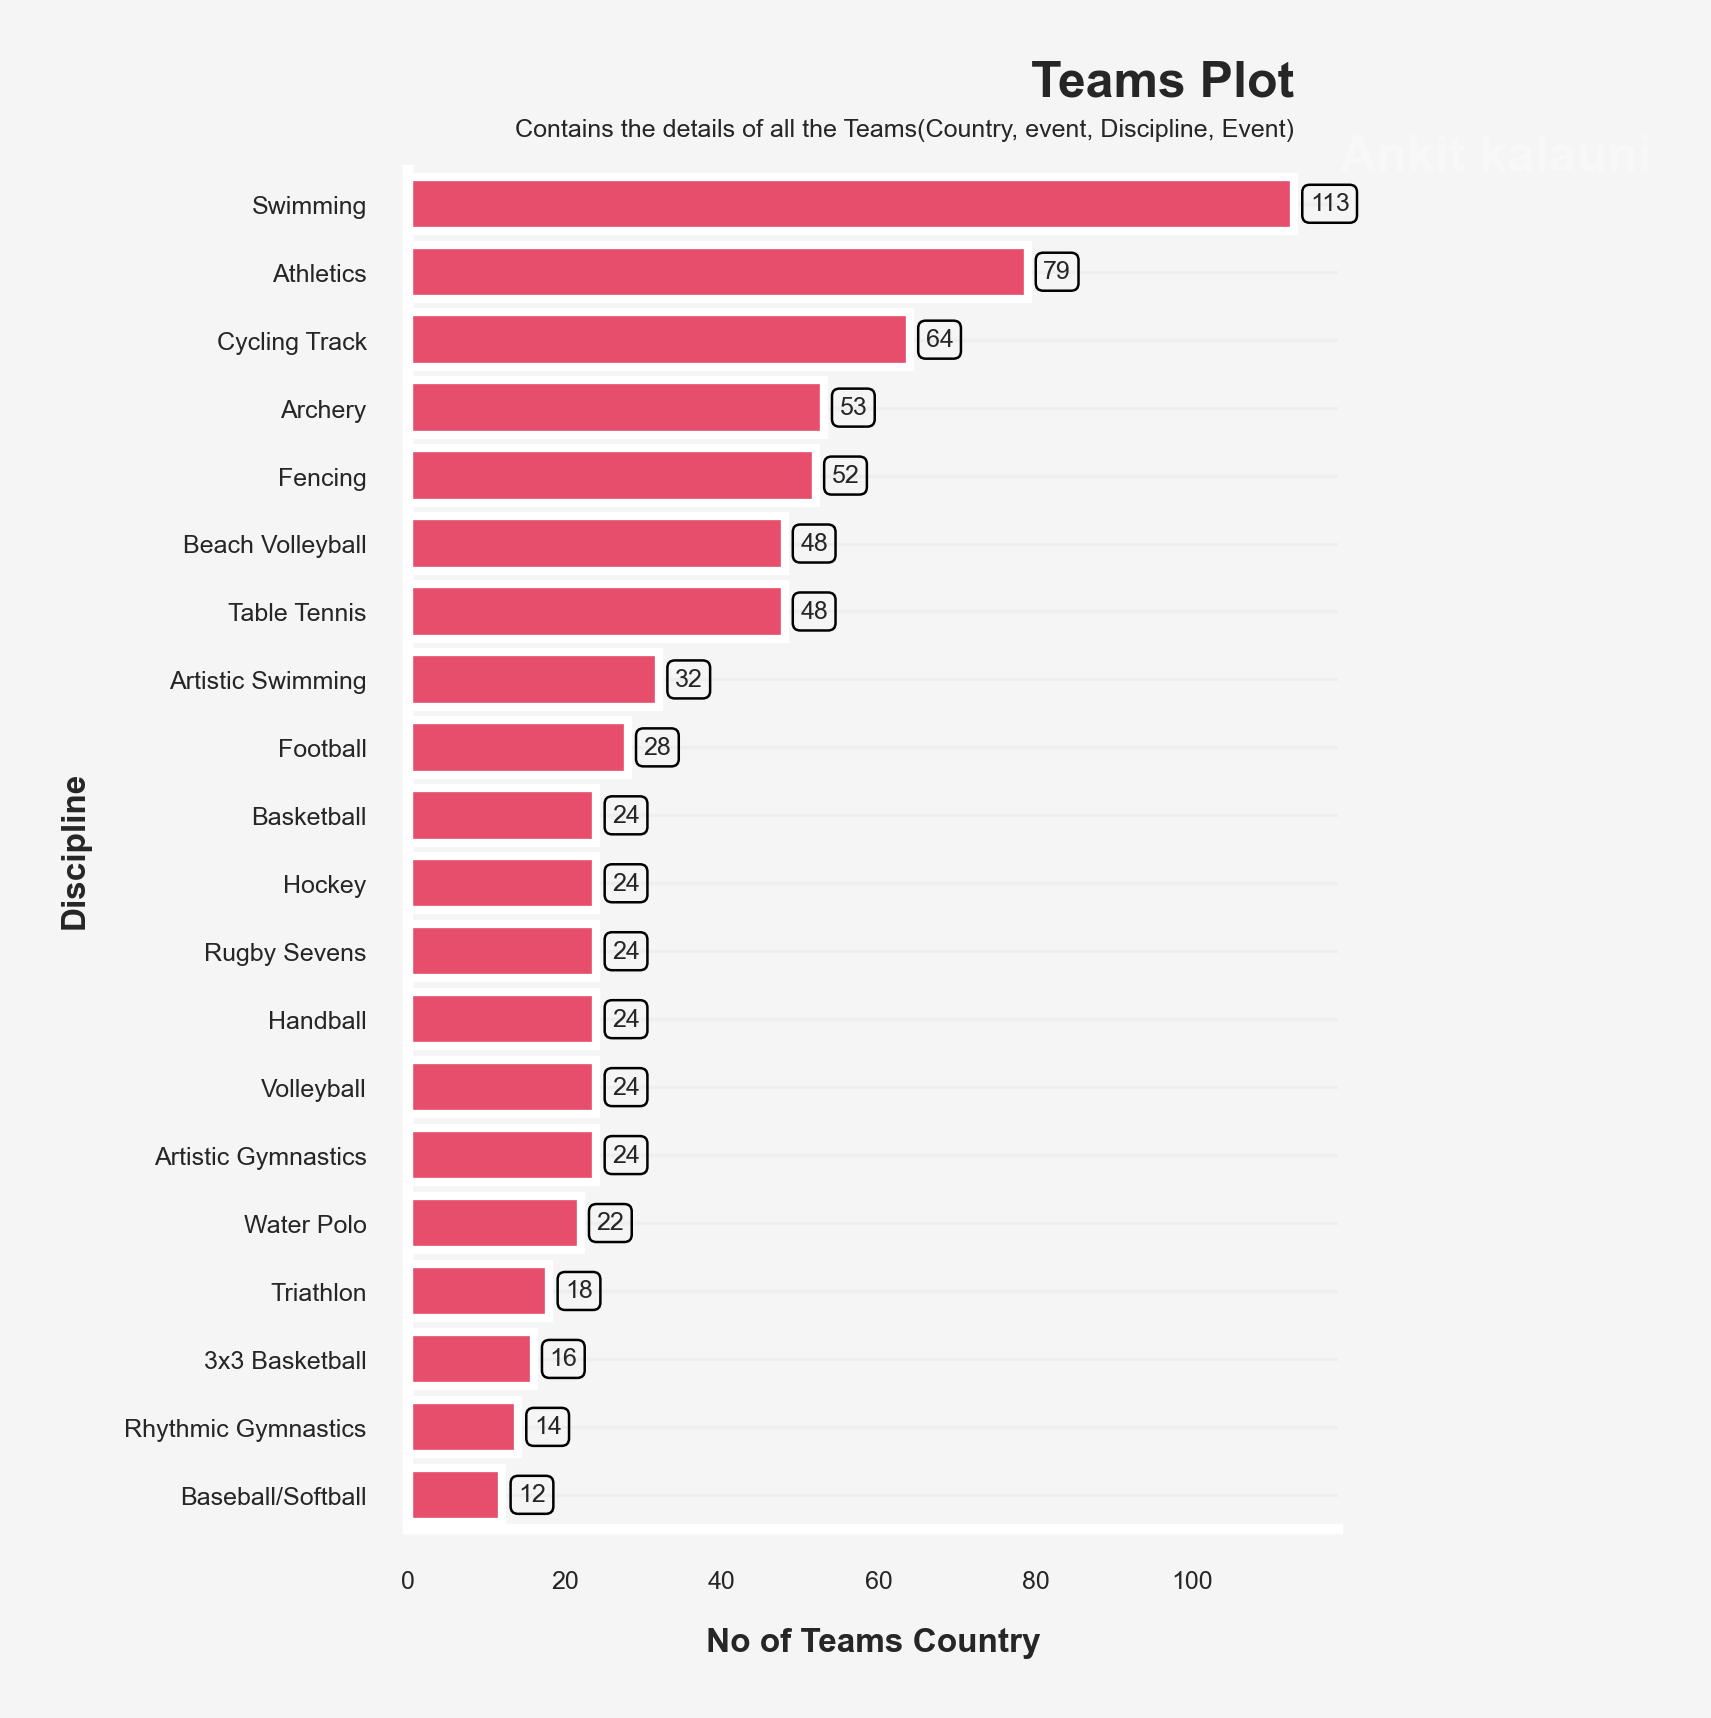

In [76]:
y = teams.Discipline.value_counts().index
x = teams.Discipline.value_counts().values

# Teams barplot
plt.rcParams['figure.dpi'] = 600

fig = plt.figure(figsize=(2,3), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=1.5, hspace=0.05)

background_color = "#f6f5f5"
sns.set_palette(['#ff355d']*1200)
ax0 = fig.add_subplot(gs[0, 0])


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    
ax0.set_facecolor(background_color)


ax0_sns = sns.barplot(data=teams,y=y,x=x,zorder=2)
ax0_sns.set_xlabel('No of Teams Country',fontsize=4, weight='bold')
ax0_sns.set_ylabel('Discipline',fontsize=4, weight='bold')

ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax0_sns.tick_params(labelsize=3, width=0.5, length=1.5)

# ax0_sns.legend(['Country Count'], ncol=2, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1.022, 1.035), loc='upper right')

for p in ax0_sns.patches:
            value = f'{p.get_width():.0f}'
            x = p.get_x() + p.get_width() + 2
            y = p.get_y() + p.get_height() / 2 
            ax0.text(x, y, value, ha='left', va='center', fontsize=3, 
                    bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

# plt.title(f'Teams Plot',fontdict=dict(fontsize=6,weight='bold',horizontalalignment= 'right'),loc='right')

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0_sns.text(158.65,Yend, f'Ankit kalauni',alpha=0.3, fontsize=6, weight='bold',ha='right',color='w') #ignore this line if you reading this


ax0_sns.text(113,-1.6, f'Teams Plot', fontsize=6, weight='bold',ha='right')
ax0.text(113,-1,f'Contains the details of all the Teams(Country, event, Discipline, Event)',fontsize=3,ha='right')
#ax0.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

## **4. Medals EDA**

In [80]:
medals.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [81]:
medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           93 non-null     int64 
 1   Team/NOC       93 non-null     object
 2   Gold           93 non-null     int64 
 3   Silver         93 non-null     int64 
 4   Bronze         93 non-null     int64 
 5   Total          93 non-null     int64 
 6   Rank by Total  93 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 5.2+ KB


In [82]:
medals.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


In [95]:
medals = medals.sort_index(ascending=False)

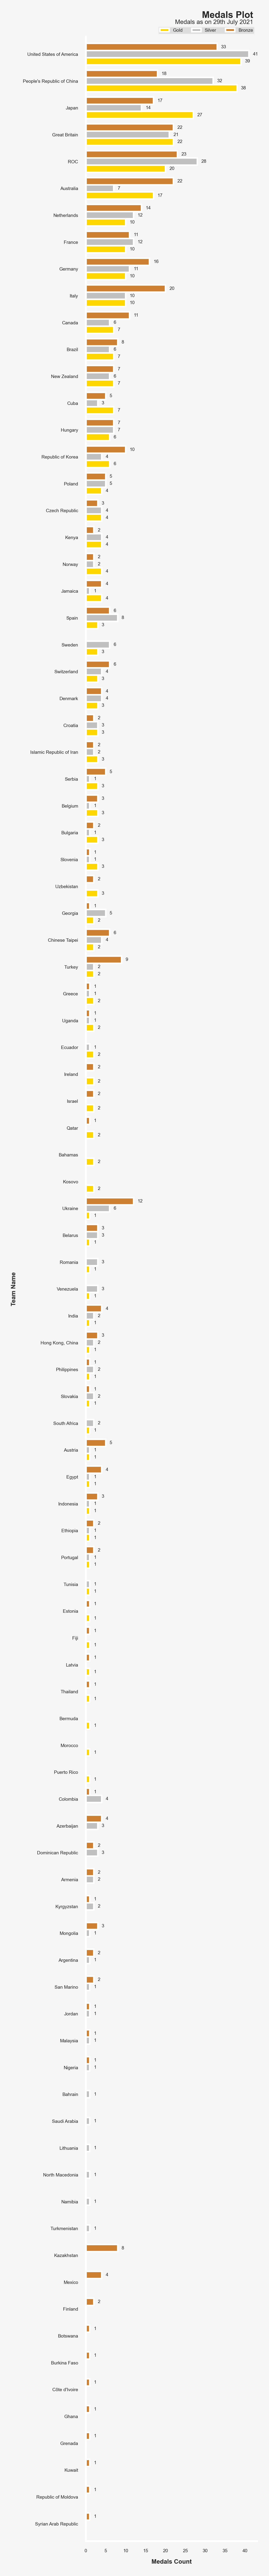

In [96]:
# Medals barplot
plt.rcParams['figure.dpi'] = 600

fig = plt.figure(figsize=(2,30), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=1.5, hspace=0.05)

background_color = "#f6f5f5"
sns.set_palette(['#FFD700','#C0C0C0','#CD7F32'])
ax0 = fig.add_subplot(gs[0, 0])


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    
ax0.set_facecolor(background_color)


ax0_sns = medals.plot(x='Team/NOC',y=['Gold','Silver','Bronze'],kind='barh',ax=ax0,zorder=2,width=0.8) ##plotttt
ax0_sns.set_xlabel('Medals Count',fontsize=4, weight='bold',)
ax0_sns.set_ylabel('Team Name',fontsize=4, weight='bold')

ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax0_sns.tick_params(labelsize=3, width=0.5, length=1.5)

ax0_sns.legend(['Gold', 'Silver','Bronze'], ncol=3, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1, 1.005), loc='upper right')

for p in ax0_sns.patches:
        value = f'{p.get_width():.0f}'
        if value == '0':
            pass
        else:
            x = p.get_x() + p.get_width() + 1
            y = p.get_y() + p.get_height() / 2
            ax0.text(x, y, value, ha='left', va='center', fontsize=3)

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0_sns.text(Xend-1, Yend+0.71, f'Medals Plot', fontsize=6, weight='bold',ha='right')
ax0.text(Xend-1, Yend+0.48,f'Medals as on 29th July 2021',fontsize=4,ha='right')

#ax0.get_xaxis().set_m8ajor_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()